# ライブラリのインポート

In [12]:
# ライブラリのインポート
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import japanize_matplotlib
%matplotlib inline

# テストデータの作成

In [23]:
# テストデータの作成
df = pd.DataFrame([["A", "X"], ["B", "Y"], ["C", "X"], ["A", "Y"], ["C", "Y"], ["B", "X"], ["A", "X"], ["B", "Y"]], columns=["col1", "col2"])

# dateデータの追加
import datetime
date = ["2023-1-1", "2023-1-1", "2023-1-1", "2023-1-1", "2023-1-2", "2023-1-2", "2023-1-2", "2023-1-2"]
date = pd.to_datetime(date)
df["date"] = date
df

,col1,col2,date
0,A,X,2023-01-01
1,B,Y,2023-01-01
2,C,X,2023-01-01
3,A,Y,2023-01-01
4,C,Y,2023-01-02
5,B,X,2023-01-02
6,A,X,2023-01-02
7,B,Y,2023-01-02


# シンプルなバブルチャート

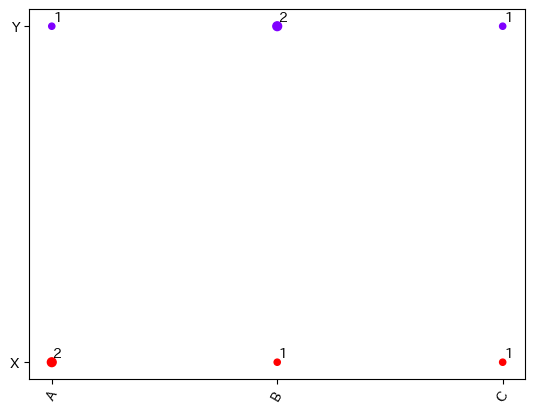

In [13]:
# groupbyしてカウント
df_group = df.groupby(["col1", "col2"]).size().reset_index(name="Counts")

# col1とcol2の要素をリストに
x = df_group["col1"].tolist()
y = df_group["col2"].tolist()

# "Counts"列の値を元に散布図のすべての点の大きさを表すリスト作成
sizes = [size * 20 for size in df_group["Counts"].tolist()]

# "Counts"列からなる値を元に、散布図のすべての点のカウント数を示すリストを作成
nums = [num for num in df_group["Counts"].tolist()]

# "col2"列からなる値を元に、カテゴリーのリストを作成
categories = list(set(y))
# 色マップを作成

colors = cm.rainbow(np.linspace(0, 1, len(categories)))
colors = {categories[i]: colors[i] for i in range(len(categories))}
colors = [colors[item] for item in y]
# 散布図を作成

fig, ax = plt.subplots()
ax.scatter(x, y, s=sizes, c=colors)

# 散布図にカウント数を表示
for i, txt in enumerate(nums):
    ax.annotate(txt, (x[i], y[i]), textcoords="offset points", xytext=(1,1), ha='left', va='bottom')

# X軸項目を60°傾ける
plt.xticks(rotation=60)

# 図を表示
plt.show()

# 年月を横軸としたバブルチャート

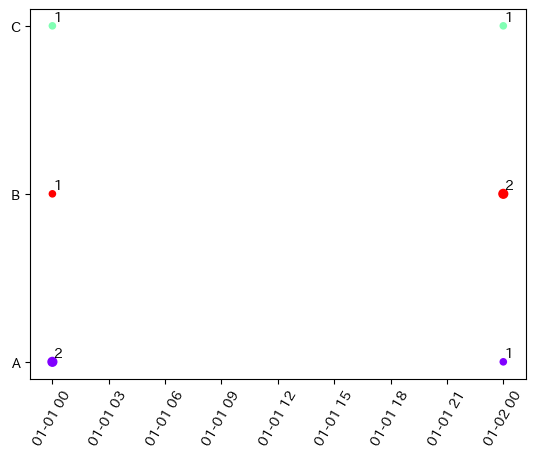

In [28]:
# groupbyしてカウント
df_group = df.groupby([pd.Grouper(key="date", freq="D"), "col1"]).size().reset_index(name="Counts")

# dateとcol1の要素をリストに
x = df_group["date"].tolist()
y = df_group["col1"].tolist()

# "Counts"列の値を元に散布図のすべての点の大きさを表すリスト作成
sizes = [size * 20 for size in df_group["Counts"].tolist()]

# "Counts"列からなる値を元に、散布図のすべての点のカウント数を示すリストを作成
nums = [num for num in df_group["Counts"].tolist()]

# "col2"列からなる値を元に、カテゴリーのリストを作成
categories = list(set(y))
# 色マップを作成

colors = cm.rainbow(np.linspace(0, 1, len(categories)))
colors = {categories[i]: colors[i] for i in range(len(categories))}
colors = [colors[item] for item in y]
# 散布図を作成

fig, ax = plt.subplots()
ax.scatter(x, y, s=sizes, c=colors)

# 散布図にカウント数を表示
for i, txt in enumerate(nums):
    ax.annotate(txt, (x[i], y[i]), textcoords="offset points", xytext=(1,1), ha='left', va='bottom')

# X軸項目を60°傾ける
plt.xticks(rotation=60)

# 図を表示
plt.show()